In [31]:
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
car_sales = pd.read_csv('MVA_Vehicle_Sales_Counts_by_Month_for_Calendar_Year_2002_through_February_2023.csv')
car_sales.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410


In [33]:
car_sales['Avg_Used'] = car_sales['Total Sales Used'] / car_sales['Used']

car_sales['Avg_New'] = car_sales['Total Sales New'] / car_sales['New']

In [45]:
car_sales

,Year,Month,New,Used,Total Sales New,Total Sales Used,Avg_Used,Avg_New,Avg_Used_Previous,Avg_New_Previous,Change_Car_Sales_Used,Change_Car_Sales_New,Ratio_Used_New,Ratio_Used_New_prev,Ratio_Used_New_Change,Ratio_Used_New_Sales,Ratio_Used_New_Sales_Prev,Ratio_Used_New_Sales_Change
1,2002,FEB,27520,50982,664454223,361353242,7087.859284,24144.412173,7740.940353,24272.353244,-0.092141,-0.005299,1.852544,1.605060,0.133591,0.293561,0.318920,0.086384
2,2002,MAR,34225,58794,805666244,419385387,7133.132411,23540.284704,7087.859284,24144.412173,0.006347,-0.025664,1.717867,1.852544,-0.078398,0.303018,0.293561,-0.031209
3,2002,APR,36452,59817,846368297,433061150,7239.767123,23218.706710,7133.132411,23540.284704,0.014729,-0.013850,1.640980,1.717867,-0.046854,0.311808,0.303018,-0.028189
4,2002,MAY,37359,60577,855005784,442569410,7305.898443,22886.206376,7239.767123,23218.706710,0.009052,-0.014528,1.621483,1.640980,-0.012024,0.319227,0.311808,-0.023243
5,2002,JUN,36348,55415,830251613,414731166,7484.095750,22841.741306,7305.898443,22886.206376,0.023810,-0.001947,1.524568,1.621483,-0.063569,0.327650,0.319227,-0.025707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2022,OCT,22255,47325,1060091844,804805365,17005.924247,47633.873017,17366.504576,47788.648533,-0.021203,-0.003249,2.126488,2.105314,0.009958,0.357013,0.363402,0.017896
250,2022,NOV,21117,43345,993531237,734729853,16950.740639,47048.881801,17005.924247,47633.873017,-0.003256,-0.012434,2.052612,2.126488,-0.035992,0.360279,0.357013,-0.009065
251,2022,DEC,23025,40906,1120587035,718545405,17565.770425,48668.275136,16950.740639,47048.881801,0.035013,0.033274,1.776591,2.052612,-0.155366,0.360929,0.360279,-0.001799
252,2023,JAN,21037,45543,992034915,762502754,16742.479722,47156.672292,17565.770425,48668.275136,-0.049174,-0.032055,2.164900,1.776591,0.179366,0.355039,0.360929,0.016587


In [35]:
car_sales['Avg_Used_Previous'] = car_sales['Avg_Used'].shift(1)

car_sales['Avg_New_Previous'] = car_sales['Avg_New'].shift(1)


In [36]:
car_sales['Change_Car_Sales_Used'] = (car_sales['Avg_Used'] - car_sales['Avg_Used_Previous']) / car_sales['Avg_Used']

car_sales['Change_Car_Sales_New'] = (car_sales['Avg_New'] - car_sales['Avg_New_Previous']) / car_sales['Avg_New']

In [44]:
car_sales.dropna(inplace=True)

car_sales.to_csv('Car_sales.csv')

<AxesSubplot:>

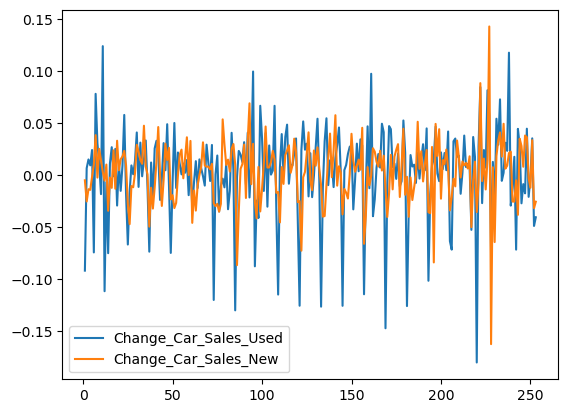

In [38]:
car_sales.plot(y=['Change_Car_Sales_Used', 'Change_Car_Sales_New'])

In [39]:
car_sales['Ratio_Used_New'] = car_sales['Used'] / car_sales['New']


car_sales['Ratio_Used_New_prev'] = car_sales['Ratio_Used_New'].shift(1)

car_sales['Ratio_Used_New_Change'] = (car_sales['Ratio_Used_New'] - car_sales['Ratio_Used_New_prev']) / car_sales['Ratio_Used_New']


car_sales['Ratio_Used_New_Sales'] = car_sales['Avg_Used'] / car_sales['Avg_New']

car_sales['Ratio_Used_New_Sales_Prev'] = car_sales['Ratio_Used_New_Sales'].shift(1)

car_sales['Ratio_Used_New_Sales_Change'] = (car_sales['Ratio_Used_New_Sales_Prev'] - car_sales['Ratio_Used_New_Sales']) / car_sales['Ratio_Used_New_Sales']






<AxesSubplot:>

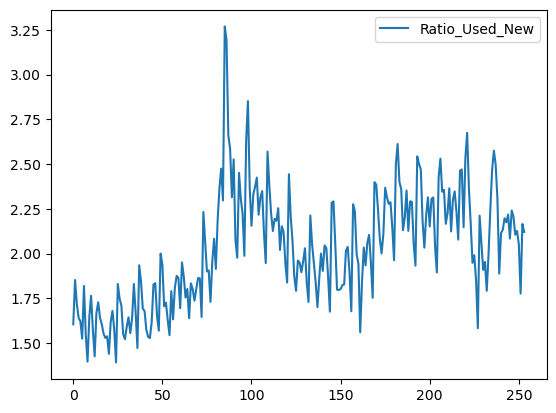

In [40]:
car_sales.plot(y=['Ratio_Used_New'])

<AxesSubplot:>

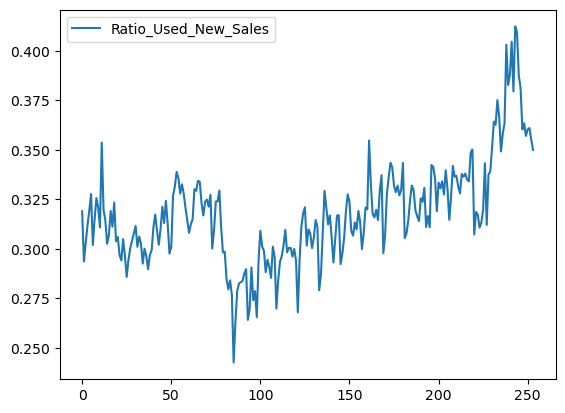

In [41]:
car_sales.plot(y=['Ratio_Used_New_Sales'])

In [42]:
groupby = car_sales.groupby(by='Month ').mean()
groupby

,Year,New,Used,Total Sales New,Total Sales Used,Avg_Used,Avg_New,Avg_Used_Previous,Avg_New_Previous,Change_Car_Sales_Used,Change_Car_Sales_New,Ratio_Used_New,Ratio_Used_New_prev,Ratio_Used_New_Change,Ratio_Used_New_Sales,Ratio_Used_New_Sales_Prev,Ratio_Used_New_Sales_Change
Month,,,,,,,,,,,,,,,,,
APR,2012.0,29667.476190,59628.333333,8.588527e+08,5.626158e+08,9520.113539,29444.359626,9241.008982,29792.326798,0.027740,-0.013042,2.052601,2.225093,-0.081394,0.319847,0.306950,-0.039894
AUG,2012.0,30597.047619,60737.666667,9.257782e+08,5.956636e+08,9824.792895,30922.211425,9889.203578,30282.945357,-0.005872,0.019770,2.034888,1.997647,0.014580,0.315198,0.323634,0.026438
DEC,2012.0,25145.428571,47556.333333,8.227429e+08,5.047261e+08,10633.170119,32821.221257,10265.223481,31987.963748,0.037827,0.022410,1.915554,2.077802,-0.088110,0.321343,0.316686,-0.014999
FEB,2012.5,22263.363636,49481.500000,6.951802e+08,4.791398e+08,9706.243228,31446.402371,10405.837434,32221.662019,-0.078846,-0.024554,2.263132,1.821310,0.188937,0.304334,0.319436,0.053393
JAN,2012.5,27190.272727,48479.363636,8.618814e+08,5.055399e+08,10405.837434,32221.662019,10633.170119,32821.221257,-0.011037,-0.004192,1.821310,1.915554,-0.054762,0.319436,0.321343,0.007425
JUL,2012.0,30225.095238,58975.761905,9.004706e+08,5.833114e+08,9889.203578,30282.945357,9787.576447,29465.290866,0.010391,0.026719,1.997647,1.902016,0.047436,0.323634,0.329049,0.016917
JUN,2012.0,32056.523810,59506.333333,9.268505e+08,5.792766e+08,9787.576447,29465.290866,9580.885241,29141.251882,0.020181,0.009464,1.902016,1.987361,-0.049885,0.329049,0.325517,-0.010580
MAR,2012.0,29070.666667,63034.047619,8.592952e+08,5.831973e+08,9241.008982,29792.326798,9402.477497,30754.953578,-0.015159,-0.032926,2.225093,2.269887,-0.023946,0.306950,0.302163,-0.016627
MAY,2012.0,30265.047619,58577.380952,8.685176e+08,5.608313e+08,9580.885241,29141.251882,9520.113539,29444.359626,0.005715,-0.011878,1.987361,2.052601,-0.035890,0.325517,0.319847,-0.017219


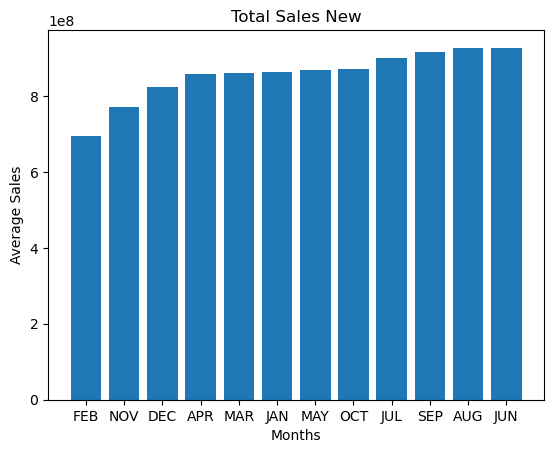

In [43]:
# Create the plot with ax.plt()
fig, ax = plt.subplots()
groupby = groupby.sort_values(by='Total Sales New')
ax.bar(groupby.index, groupby[f'Total Sales New'])

ax.set_xlabel('Months')
ax.set_ylabel('Average Sales')

ax.set_title('Total Sales New')

# save image

# Save the figure
plt.savefig(f'Total Sales New.png')

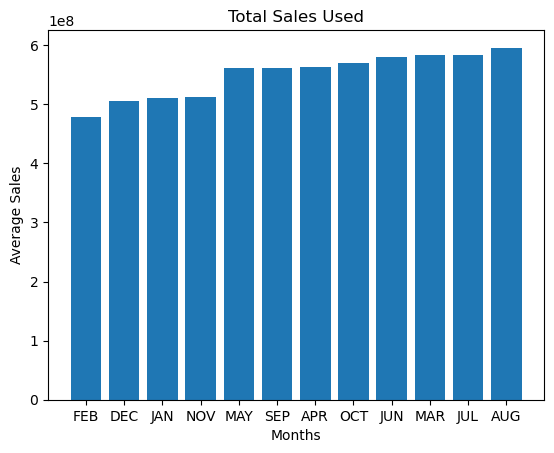

In [22]:
# Create the plot with ax.plt()
fig, ax = plt.subplots()
groupby = groupby.sort_values(by='Total Sales Used')
ax.bar(groupby.index, groupby[f'Total Sales Used'])

ax.set_xlabel('Months')
ax.set_ylabel('Average Sales')

ax.set_title('Total Sales Used')

# save image

# Save the figure
plt.savefig(f'Total Sales Used.png')

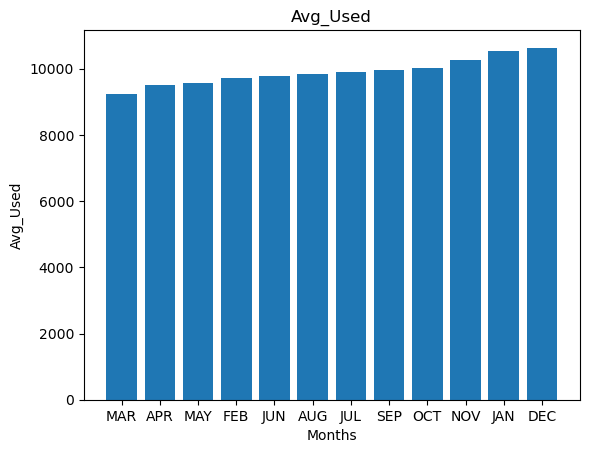

In [23]:
# Create the plot with ax.plt()
fig, ax = plt.subplots()
groupby = groupby.sort_values(by='Avg_Used')
ax.bar(groupby.index, groupby[f'Avg_Used'])

ax.set_xlabel('Months')
ax.set_ylabel('Avg_Used')

ax.set_title('Avg_Used')

# save image

# Save the figure
plt.savefig(f'Avg_Used.png')

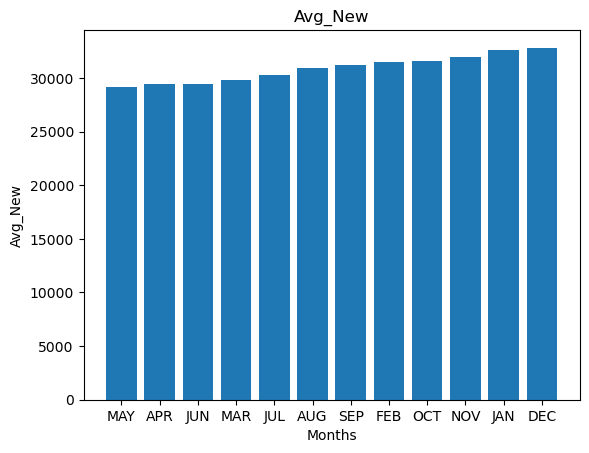

In [24]:
# Create the plot with ax.plt()
fig, ax = plt.subplots()
groupby = groupby.sort_values(by='Avg_New')
ax.bar(groupby.index, groupby[f'Avg_New'])

ax.set_xlabel('Months')
ax.set_ylabel('Avg_New')

ax.set_title('Avg_New')

# save image

# Save the figure
plt.savefig(f'Avg_New.png')

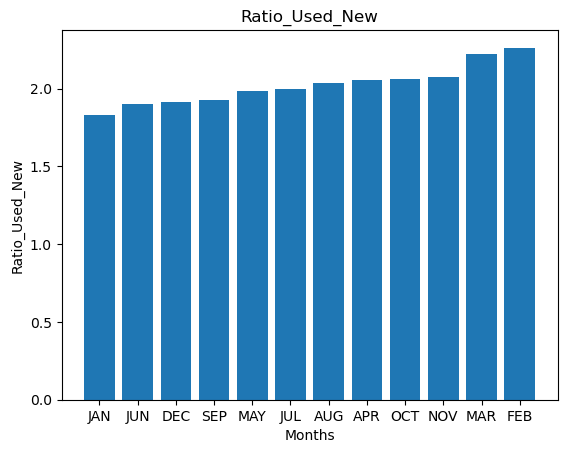

In [26]:
# Create the plot with ax.plt()
fig, ax = plt.subplots()
groupby = groupby.sort_values(by='Ratio_Used_New')
ax.bar(groupby.index, groupby[f'Ratio_Used_New'])

ax.set_xlabel('Months')
ax.set_ylabel('Ratio_Used_New')

ax.set_title('Ratio_Used_New')

# save image

# Save the figure
plt.savefig(f'Ratio_Used_New.png')

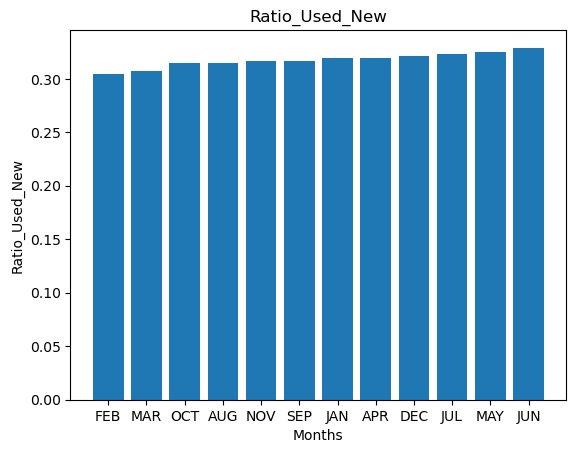

In [28]:
# Create the plot with ax.plt()
fig, ax = plt.subplots()
groupby = groupby.sort_values(by='Ratio_Used_New_Sales')
ax.bar(groupby.index, groupby[f'Ratio_Used_New_Sales'])

ax.set_xlabel('Months')
ax.set_ylabel('Ratio_Used_New')

ax.set_title('Ratio_Used_New')

# save image

# Save the figure
plt.savefig(f'Ratio_Used_New.png')